In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
from helpers.helpers import set_size
import matplotlib.ticker as ticker
import statsmodels
import statsmodels.api as sm
import numpy as np
import seaborn as sns
df = pd.read_csv("./data/banned_final.csv")
df.banDate = pd.to_datetime(df.banDate)
df_att = pd.read_csv("./data/joined_final.csv")
df_att.value_date = pd.to_datetime(df_att.value_date)
df_att = df_att[df_att.source != "mediacloud"]

0.03
0.021666666666666667
2017-12-18T00:00:00.000000000
2019-04-18T00:00:00.000000000
0.061666666666666675
0.07833333333333332
2021-01-13T00:00:00.000000000


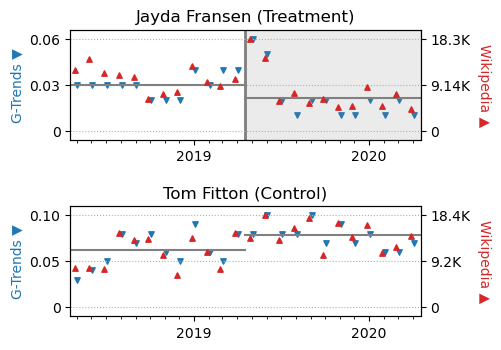

In [2]:
from datetime import timedelta

fs = (5, 3.5)
fig, axs = plt.subplots(2, 1, figsize=fs, gridspec_kw={"hspace": 0.6, "wspace": 0.5})
axs = axs.flatten()

bd = pd.to_datetime("2019-04-18")
for idx, entity, l, u in [
    (0, "Jayda Fransen",  bd - timedelta(days=365), bd + timedelta(days=365)),
    (1, "Tom Fitton", bd - timedelta(days=365), bd + timedelta(days=365))]:
    ax1 = axs[idx]
    ax2 = ax1.twinx()


    x1 = df_att[(df_att.entity == entity) & (df_att.source == "gtab")]\
        .groupby(pd.Grouper(key="value_date", freq="m")).value.sum()
    
    x1 = x1[x1.index.values >= pd.to_datetime(l)]
    x1 = x1[x1.index.values < pd.to_datetime(u)]
    x_ban = df[(df.entity == entity)]
    mean_pre = x1[x1.index.values < pd.to_datetime(bd)].mean()
    print(mean_pre)
    mean_pos = x1[x1.index.values >= pd.to_datetime(bd)].mean()
    print(mean_pos)

    ax1.plot(
    [pd.to_datetime(l), pd.to_datetime(bd)],
    [mean_pre, mean_pre], color="gray")
    ax1.plot(
    [pd.to_datetime(bd),  pd.to_datetime(u)],
    [mean_pos, mean_pos], color="gray")
    
    ax1.scatter([v + timedelta(days=3) for v in x1.index] , x1.values, marker="v", s=15, color="tab:blue")

    x2 = df_att[(df_att.entity == entity) & (df_att.source == "wikimedia")]\
        .groupby(pd.Grouper(key="value_date", freq="m")).value.sum()
    x2 = x2[x2.index.values >= pd.to_datetime(l)]
    x2 = x2[x2.index.values < pd.to_datetime(u)]
    x_ban = df[(df.entity == entity)]
    ax2.scatter([v - timedelta(days=3) for v in x2.index], x2.values, marker="^", s=15, color="tab:red")
        
    for ax, x in zip([ax1, ax2], [x1, x2]):
        ax.set_ylim(0 - max(x)/10, max(x) + max(x)/10)
        ylim_ax = ax.get_ylim()
        ylim_ax_mid = (ylim_ax[1] + ylim_ax[0])/2
        ylim_ax_d = (0 - ylim_ax[0])
        ax.set_yticks([0, ylim_ax_mid, ylim_ax[1] - ylim_ax_d])
        
    def y_fmt(x, y):
        if x == 0:
            return "0"
        if x < 0.5:
            return '{:1.2f}'.format(round(x, 2))
        if x < 1:
            return '{:1.1f}'.format(round(x, 1))
        if x < 10:
            return '{:1.1f}'.format(round(x, 1))
        if x < 1000:
            return "{:.0f}".format(round(x))
        else:
            num = float('{:.3g}'.format(x))
            magnitude = 0
            while abs(num) >= 1000:
                magnitude += 1
                num /= 1000.0
            return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    ax1.set_ylabel("G-Trends ▼", color="tab:blue")
    ax2.set_ylabel("Wikipedia ▲", color="tab:red", rotation=270, labelpad=15)
    
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    ax1.set_xlim([  pd.to_datetime(l),  pd.to_datetime(u)])
    ax2.set_xlim([  pd.to_datetime(l),  pd.to_datetime(u)])
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    #     ax.plot(x.index, x.values, marker=".")
    #     ax.set_xlabel("Date")
    ax1.yaxis.grid(True, ls=":")
    flag = 1
    tmp__ = x_ban.drop_duplicates("bgid")
    for date, isTemp in zip(tmp__.banDate.values, tmp__.isTemporary.values):
        print(date)
        if date >  pd.to_datetime(u) or date < pd.to_datetime(l):
            continue
        ax1.axvspan(date, pd.to_datetime(u), color="tab:gray", alpha=0.15)
        ax1.axvline(date, zorder=-3, color="tab:grey", lw=2, alpha=1, ls=":" if isTemp else "-",
                    label="Deplatforming" if flag == 1 else None)
        flag = 0

    #ax1.legend()
    ax1.set_title(entity + " (Treatment)" if idx == 0 else entity + " (Control)")

set_size(fig, fs)
fig.savefig("./images/example_did.pdf", bbox_inches="tight")

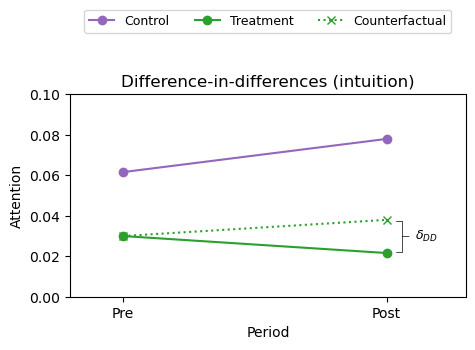

In [3]:
fs = (4.75, 3.5)
fig, axs = plt.subplots(1, 1, figsize=fs, gridspec_kw={"hspace": 0.6, "wspace": 0.5})

plt.plot([1, 2], [0.0616, 0.078], marker="o", color="tab:purple", label="Control")
plt.plot([1, 2], [0.03, 0.0216], marker="o", color="tab:green", label="Treatment")
plt.plot([1, 2], [0.03, 0.038], marker="x", color="tab:green", label="Counterfactual", zorder=-1, ls=":")
plt.plot
plt.xlim([0.8, 2.3])
plt.ylim([0, 0.1])
plt.xticks([1, 2], ["Pre", "Post"])


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), fontsize=9, ncol=3)
# Here is the label and arrow code of interest
plt.annotate('$\delta_{DD}$', xy=(2.05, 0.0298), xytext=(2.15, .0298), #xycoords='axes fraction', 
            fontsize=9, ha='center', va='center',
            arrowprops=dict(arrowstyle='-[, widthB=1.25, lengthB=.5', lw=0.5, color='k'))
plt.title("Difference-in-differences (intuition)")
plt.ylabel("Attention")
plt.xlabel("Period")
set_size(fig, fs)
fig.savefig("./images/example_did2.pdf", bbox_inches="tight")

# Gets dataframe


In [4]:
df = pd.read_csv("./data/banned_final.csv")
df.banDate = pd.to_datetime(df.banDate)
df_att = pd.read_csv("./data/joined_final.csv")
df_att.value_date = pd.to_datetime(df_att.value_date)

In [5]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month


df_simplified = df.drop(["isRelevant", "kind", "searchTerm", "reasonComment", "gid", "article", 
         "qid", "descriptions", "sources"], axis=1)
df_simplified = pd.get_dummies(df_simplified, columns=["platform", "reason", "isTemporary"])

df_simplified.columns

df_simplified = df_simplified.groupby(["entity", "bgid"]).max().reset_index()
df_simplified["banDate_months_since_2015"]  = df_simplified.banDate.apply(lambda x: 
                                                                          diff_month(x, pd.to_datetime("2015")))
df_simplified

,entity,bgid,banDate,politician,media_personality,internet_personality,fringe_movements,platform_facebook,platform_instagram,platform_twitter,platform_youtube,reason_Hate/Harassment/Incitement to Violence,reason_Manipulation/Misinformation,reason_Other,isTemporary_False,isTemporary_True,banDate_months_since_2015
0,Alex Jones,1,2018-08-06,False,True,True,True,True,True,False,True,True,False,False,True,False,43
1,Alex Jones,2,2018-09-06,False,True,True,True,False,False,True,False,True,False,False,True,False,44
2,Alex Jones,3,2019-05-02,False,True,True,True,True,True,False,False,True,False,False,True,True,52
3,Ali Alexander,4,2021-01-10,False,False,True,True,False,False,True,False,True,False,False,True,False,72
4,Ali Khamenei,5,2019-04-16,True,False,False,False,False,True,False,False,False,False,True,True,False,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Tommy Robinson,135,2019-06-14,False,False,False,True,False,False,False,True,True,False,False,True,False,53
134,Tommy Robinson,136,2020-08-07,False,False,False,True,False,True,False,False,True,False,False,False,True,67
135,Tyra Sanchez,137,2018-04-25,False,True,False,False,False,False,True,False,True,False,False,True,False,39
136,Win Gatchalian,138,2019-09-04,True,False,False,False,False,False,True,False,False,True,False,False,True,56


In [6]:

df_att["months_since_2015"]  = df_att.value_date.apply(lambda x: diff_month(x, pd.to_datetime("2015")))
df_att_simplified = df_att.groupby(["entity", "google_id", "source", "months_since_2015"]
                                  ).value.mean().reset_index()

In [7]:

def get_tuples(months, data, diff=12):
    
    acc = []
    
    data_permanent = data.loc[data.isTemporary_False].copy(deep=True)
    for idx, rowx in data.sort_values("banDate_months_since_2015").iterrows():
        rowx = dict(rowx)
        entity_x = rowx["entity"]
        ban_date_x = rowx["banDate_months_since_2015"]
        
        previous_bans = data[(data["entity"] == entity_x) & 
                  (data["banDate_months_since_2015"] < ban_date_x)].banDate_months_since_2015
        
        # if previously banned very recently, remove
        match_ban = True
        for ban_date_y in previous_bans:
            if ban_date_y < ban_date_x + diff and ban_date_y > ban_date_x - diff:
                match_ban=False
        
        if not match_ban:
            continue
#         print(rowx)
        
        
        pass_criteria_1 = []
        for entity_y, df_y in data_permanent.groupby("entity"):
            if entity_y == entity_x:
                continue
                
            min_date_ban_y = min(df_y.banDate_months_since_2015.values)
            max_date_ban_y = max(df_y.banDate_months_since_2015.values)
            if min_date_ban_y >= ban_date_x + diff:
                #print(entity_y, df_y.banDate_months_since_2015.values)
                pass_criteria_1.append(entity_y)
        #print(pass_criteria_1)
        
        pass_criteria_2 = []
        for entity_y, df_y in data.groupby("entity"):
            
            if entity_y == entity_x:
                continue
                
            match_ban = True
            
            for ban_date_y in df_y.banDate_months_since_2015:
                if ban_date_y < ban_date_x + diff and ban_date_y > ban_date_x - diff:
                    match_ban=False
            
            if match_ban:
                pass_criteria_2.append(entity_y)
        
        tmp = list(set(pass_criteria_1).intersection(set(pass_criteria_1)))
        flag = "o%" if len(tmp) > 0 else "x%"
        
        for entity_y in tmp:
            acc.append({
            "experiment": ban_date_x,
            "entity": entity_y,
            "condition": "control",
            })
        if len(tmp) > 0:
            acc.append({
            "experiment": ban_date_x,
            "entity": entity_x,
            "condition": "treatment",
            })
            print(ban_date_x, flag, entity_x,  len(tmp))
            
    return pd.DataFrame(acc)


df_tuples = get_tuples(1, df_simplified).drop_duplicates(["experiment", "entity"])

16 o% Azealia Banks 57
17 o% Mark Kern 56
18 o% Hamza Abbasi 56
18 o% Hafiz Saeed 56
18 o% Milo Yiannopoulos 56
21 o% Jonathan Daniel Brown 55
24 o% Martin Shkreli 50
24 o% Carl Benjamin 49
26 o% David Duke 49
29 o% Anthony Cumia 45
33 o% Rose McGowan 42
33 o% Kamaal R. Khan 42
33 o% Roger Stone 42
33 o% Austin Petersen 42
33 o% Guo Wengui 42
34 o% Baked Alaska 42
35 o% James Allsup 39
35 o% Jayda Fransen 39
36 o% Paul Nehlen 39
36 o% Beatrix von Storch 39
36 o% David Clarke 39
38 o% Tommy Robinson 39
39 o% Richard B. Spencer 39
39 o% Betzalel Smotrich 39
39 o% Owen Benjamin 39
39 o% Tyra Sanchez 39
41 o% Gavin McInnes 33
41 o% Azealia Banks 33
43 o% TJ Kirk 31
43 o% Alex Jones 31
44 o% Kris Paronto 31
44 o% James Woods 31
46 o% Laura Loomer 29
46 o% Jesse Kelly 29
46 o% Khadim Hussain Rizvi 29
46 o% Meghan Murphy 29
47 o% Titania McGrath 29
51 o% Carl Benjamin 28
51 o% Faith Goldy 28
51 o% Ben Garrison 28
51 o% Ali Khamenei 28
51 o% Jayda Fransen 28
51 o% Sara Duterte 28
52 o% Candace

In [8]:
df_tuples_all = df_tuples.merge(df_att_simplified, on="entity")
df_tuples_all["diff"] = (df_tuples_all["months_since_2015"] - df_tuples_all["experiment"]).astype(int)
df_tuples_all = df_tuples_all.loc[df_tuples_all["diff"].abs() <= 12].copy(deep=True)
df_tuples_all["treat"] = (df_tuples_all["condition"] == "treatment").astype(int)
df_tuples_all.loc[df_tuples_all.value == 0, "value"] =  0.00001
df_tuples_all["logval"] = np.log(df_tuples_all["value"])
print(len(df_tuples_all))

df_simplified["isFirstBan"] = 0
first_ban = df_simplified.drop_duplicates("entity").index.values #
print(first_ban)
df_simplified.loc[[x in first_ban for x in df_simplified.index.values],  "isFirstBan"] = 1


df_tuples_all_treat = df_tuples_all[df_tuples_all.treat == 1].merge(df_simplified, 
    left_on=["entity", "experiment"], 
    right_on=["entity", "banDate_months_since_2015"])

df_tuples_all_ctrl = df_tuples_all[df_tuples_all.treat != 1]

print(len(df_tuples_all_ctrl) + len(df_tuples_all_treat))


44964
[  0   3   4   5   6   7  10  12  13  17  18  19  21  22  23  24  26  28
  29  30  31  32  35  36  38  39  40  41  42  43  46  47  49  50  51  52
  53  54  55  57  58  60  62  63  64  65  66  67  68  69  71  72  73  74
  75  77  78  79  80  81  84  85  86  88  89  90  91  94  95  96  97  99
 100 101 103 104 105 108 109 111 112 114 115 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 135 136 137]
44964


In [9]:
df_tuples_all_ex = pd.concat([df_tuples_all_treat, df_tuples_all_ctrl]).fillna(0)
df_tuples_all_ex["entity_exp"] = df_tuples_all_ex["entity"] + "_" + df_tuples_all_ex["experiment"].astype(str)
df_tuples_all_ex

,experiment,entity,condition,google_id,source,months_since_2015,value,diff,treat,logval,...,platform_twitter,platform_youtube,reason_Hate/Harassment/Incitement to Violence,reason_Manipulation/Misinformation,reason_Other,isTemporary_False,isTemporary_True,banDate_months_since_2015,isFirstBan,entity_exp
0,38,Tommy Robinson,treatment,/m/0h1ht5z,gtab,26,0.375000,-12,1,-0.980829,...,True,False,True,False,False,True,False,38.0,1.0,Tommy Robinson_38
1,38,Tommy Robinson,treatment,/m/0h1ht5z,gtab,27,0.437500,-11,1,-0.826679,...,True,False,True,False,False,True,False,38.0,1.0,Tommy Robinson_38
2,38,Tommy Robinson,treatment,/m/0h1ht5z,gtab,28,0.937500,-10,1,-0.064539,...,True,False,True,False,False,True,False,38.0,1.0,Tommy Robinson_38
3,38,Tommy Robinson,treatment,/m/0h1ht5z,gtab,29,2.500000,-9,1,0.916291,...,True,False,True,False,False,True,False,38.0,1.0,Tommy Robinson_38
4,38,Tommy Robinson,treatment,/m/0h1ht5z,gtab,30,0.750000,-8,1,-0.287682,...,True,False,True,False,False,True,False,38.0,1.0,Tommy Robinson_38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160731,21,Roger Stone,control,/m/05r8b8,wikimedia,29,3166.600000,8,0,8.060414,...,0,0,0,0,0,0,0,0.0,0.0,Roger Stone_21
160732,21,Roger Stone,control,/m/05r8b8,wikimedia,30,3176.225806,9,0,8.063449,...,0,0,0,0,0,0,0,0.0,0.0,Roger Stone_21
160733,21,Roger Stone,control,/m/05r8b8,wikimedia,31,2497.967742,10,0,7.823233,...,0,0,0,0,0,0,0,0.0,0.0,Roger Stone_21
160734,21,Roger Stone,control,/m/05r8b8,wikimedia,32,2649.066667,11,0,7.881963,...,0,0,0,0,0,0,0,0.0,0.0,Roger Stone_21


In [10]:
df_tuples_all_ex["diff2"] = df_tuples_all_ex["diff"]
df_tuples_all_ex = pd.get_dummies(df_tuples_all_ex, columns=["diff"])
for column in df_tuples_all_ex.columns:
    if "diff_" in column:
        df_tuples_all_ex[column] = df_tuples_all_ex[column].astype(int)
df_tuples_all_ex.columns = [x.replace("diff_-", "diff_m") for x in df_tuples_all_ex.columns]
df_tuples_all_ex.columns = [x.replace(" ", "_") for x in df_tuples_all_ex.columns]
df_tuples_all_ex.columns = [x.replace("/", "_") for x in df_tuples_all_ex.columns]

In [11]:
to_int = ['politician', 'media_personality', 'internet_personality',
       'fringe_movements', 'platform_facebook', 'platform_instagram',
       'platform_twitter', 'platform_youtube',
       'reason_Hate_Harassment_Incitement_to_Violence',
       'reason_Manipulation_Misinformation', 'reason_Other',
       'isTemporary_False', 'isTemporary_True', 'banDate_months_since_2015',
       'isFirstBan', 'diff_m12', 'diff_m11', 'diff_m10',
       'diff_m9', 'diff_m8', 'diff_m7', 'diff_m6', 'diff_m5', 'diff_m4',
       'diff_m3', 'diff_m2', 'diff_m1', 'diff_0', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5', 'diff_6', 'diff_7', 'diff_8', 'diff_9', 'diff_10',
       'diff_11', 'diff_12']

for col in to_int:
    df_tuples_all_ex[col] = df_tuples_all_ex[col].astype(int)

In [12]:
ref = -3
acc_form = "logval ~ "
for i in range(-12, 13):
    if i == ref:
        continue
    acc_form += " + diff_{0}:treat ".format(str(i))
acc_form = acc_form.replace("diff_-", "diff_m")
acc_form

'logval ~  + diff_m12:treat  + diff_m11:treat  + diff_m10:treat  + diff_m9:treat  + diff_m8:treat  + diff_m7:treat  + diff_m6:treat  + diff_m5:treat  + diff_m4:treat  + diff_m2:treat  + diff_m1:treat  + diff_0:treat  + diff_1:treat  + diff_2:treat  + diff_3:treat  + diff_4:treat  + diff_5:treat  + diff_6:treat  + diff_7:treat  + diff_8:treat  + diff_9:treat  + diff_10:treat  + diff_11:treat  + diff_12:treat '

In [13]:
(df_tuples_all_ex.isFirstBan == 1).sum() / len(df_tuples_all_ex)

0.06349524063695401

In [14]:
from linearmodels import PanelOLS

formula = acc_form + """  + EntityEffects + TimeEffects """
mod = PanelOLS.from_formula(formula, 
                            df_tuples_all_ex[(df_tuples_all_ex.source == "gtab")].set_index(
                                ["entity_exp", "months_since_2015"]), 
                            drop_absorbed=True)
resgt = mod.fit(cov_type='clustered', cluster_entity=True)


formula = acc_form + """  + EntityEffects + TimeEffects """
mod = PanelOLS.from_formula(formula, 
                            df_tuples_all_ex[(df_tuples_all_ex.source == "wikimedia")].set_index(
                                ["entity_exp", "months_since_2015"]), 
                            drop_absorbed=True)
reswm = mod.fit(cov_type='clustered', cluster_entity=True)

In [15]:
resgt

Dep. Variable:,logval,R-squared:,0.0034
Estimator:,PanelOLS,R-squared (Between):,0.0032
No. Observations:,25450,R-squared (Within):,0.0006
Date:,"Tue, Jan 02 2024",R-squared (Overall):,0.0029
Time:,11:10:19,Log-likelihood,-5.156e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,3.4581
Entities:,1018,P-value,0.0000
Avg Obs:,25.000,Distribution:,"F(24,24337)"
Min Obs:,25.000,,
Max Obs:,25.000,F-statistic (robust):,4.5075


-42.57 % 95\% CI [ -56.76 ,  -23.71 ]
100.72 % 95\% CI [ 53.25 ,  162.9 ]
-62.97 % 95\% CI [ -74.59 ,  -46.03 ]
174.32 % 95\% CI [ 66.77 ,  351.24 ]


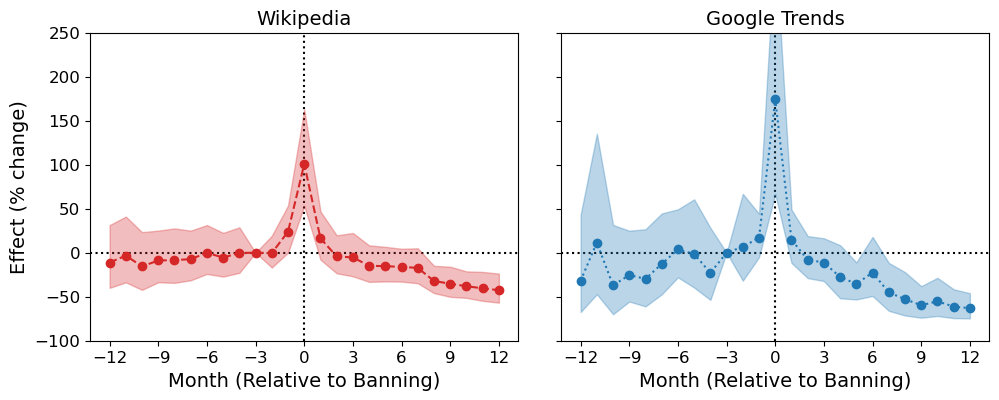

In [16]:
import numpy as np
fs = (10, 4)
fig, axs = plt.subplots(1, 2, figsize=fs, gridspec_kw={"hspace": 0.5, "wspace": 0.1}, sharey=True)
axs = axs.flatten()

for res, ax, color, lss in zip([reswm, resgt], [axs[0], axs[1]], ["tab:red", "tab:blue"],
                              ["--", ":"]):

    pes = (np.exp(res.params) - 1) * 100
    low = (np.exp((res.params - res.std_errors  * 1.96)) - 1) * 100
    hig = (np.exp((res.params + res.std_errors  * 1.96)) - 1) * 100
    
    print(round(pes.values[-1],2), "% 95\% CI [",round(low.values[-1],2), ", ",
          round(hig.values[-1], 2), "]")
    
    print(round(pes.values[-13],2), "% 95\% CI [",round(low.values[-13],2), ", ",
          round(hig.values[-13], 2), "]")

    df_ef = pd.DataFrame(
        {
            "pes": pes,
            "low": low,
            "hig": hig,
        }
    ).reset_index()

    df_ef["index"] = df_ef["index"].apply(lambda x: x.replace("diff_", "").replace(":treat", "").replace("m", "-"))

    df_ef = pd.concat(
    [
        df_ef,
         pd.DataFrame(
        {
            "index": ["-3"],
            "pes": [0],
            "low": [0],
            "hig": [0]
        } )
    ])
    df_ef["index"] = df_ef["index"].astype(int)
    df_ef = df_ef.sort_values("index").set_index("index")
    ax.plot(df_ef.pes, color=color, ls=lss)
    ax.scatter(df_ef.index.values, df_ef.pes, color=color)
    ax.fill_between(df_ef.index.values, df_ef["low"], df_ef["hig"], color=color, alpha=0.3, zorder=2)
    ax.axhline(0, ls=":", color="black", zorder=-5)
    ax.axvline(0, ls=":", color="black", zorder=-5)
    
axs[0].set_title("Wikipedia", size=14)
axs[1].set_title("Google Trends", size=14)
axs[0].set_ylabel("Effect (% change)", size=14)
axs[0].set_xticks([-12, -9, -6, -3, 0, 3, 6, 9, 12])
axs[1].set_xticks([-12, -9, -6, -3, 0, 3, 6, 9, 12])
axs[1].set_ylim([-100, +250])
axs[0].set_xlabel("Month (Relative to Banning)", size=14)
axs[1].set_xlabel("Month (Relative to Banning)", size=14)
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
set_size(fig, fs)

fig.savefig("./images/didres1.pdf", bbox_inches="tight")


In [17]:
x = df_tuples_all_ex[
    (df_tuples_all_ex.source == "wikimedia") & 
    (df_tuples_all_ex.treat==1) &
    (df_tuples_all_ex.diff_m12 ==1)  
                ][["experiment", "entity", "value", "isTemporary_False"]].drop_duplicates().sort_values(by="value").reset_index()


lowv = {(y,z): "low" for y,z in x.iloc[0:2*(len(x)//2)][["experiment", "entity"]].values}
highv = {(y,z): "high" for y,z in  x.iloc[2*(len(x)//2):][["experiment", "entity"]].values}
df_tuples_all_ex["exp_entity"] = [(y,z) for y, z in df_tuples_all_ex[["experiment", "entity"]].values]

In [18]:
x = df_tuples_all_ex[
    (df_tuples_all_ex.source == "wikimedia") & 
    (df_tuples_all_ex.treat==1) &
    (df_tuples_all_ex.diff2 == -11)  
                ][["experiment", "entity", "value"]
                 ].groupby(["experiment", "entity"]).value.sum().reset_index().sort_values(by="value")
    


lowv = {(y,z): "low" for y,z in x.iloc[0:2*(len(x)//3)][["experiment", "entity"]].values}
highv = {(y,z): "high" for y,z in  x.iloc[2*(len(x)//3):][["experiment", "entity"]].values}
df_tuples_all_ex["exp_entity"] = [(y,z) for y, z in df_tuples_all_ex[["experiment", "entity"]].values]

In [19]:
x.iloc[2*(len(x)//2):]["value"].mean()

48089.96551724138

In [20]:
df_tuples_all_ex["low_attention"] = 0
df_tuples_all_ex["low_attention"] = df_tuples_all_ex["exp_entity"].apply(lambda x: 1 if x in lowv else 0)
df_tuples_all_ex["high_attention"] = 0
df_tuples_all_ex["high_attention"] = df_tuples_all_ex["exp_entity"].apply(lambda x: 1 if x in highv else 0)

In [22]:
catsv = [
    ['*isTemporary_True'],
    ["*high_attention"],
    ['*platform_facebook', '*platform_instagram', '*platform_twitter', '*platform_youtube'],
    ['*reason_Hate_Harassment_Incitement_to_Violence', '*reason_Manipulation_Misinformation'],
    ['*politician', '*media_personality', ':internet_personality', '*fringe_movements'],
]

sources = ["gtab", "wikimedia"]

acc = []

for cats in catsv:
    for source in sources:
        ref = -3
        acc_form = "logval ~ "
        for i in range(-12, 12):
            if i == ref:
                continue
            acc_form += " + diff_{0}:treat ".format(str(i))
        acc_form = acc_form.replace("diff_-", "diff_m")

        for i in cats:
            acc_form +=  " + diff_after:treat" + i
        df_tuples_all_ex["diff_after"] = df_tuples_all_ex[[ 'diff_'+ str(i) for i in range(12,13)]].max(axis=1)
        
        formula = acc_form + """ + EntityEffects + TimeEffects """
        mod = PanelOLS.from_formula(formula, 
                                    df_tuples_all_ex[(df_tuples_all_ex.source == source)].set_index(
                                        ["entity_exp", "months_since_2015"]), 
                                    drop_absorbed=True)
        res = mod.fit(cov_type='clustered', cluster_entity=True)
        #print(cats)
        #print(res)
        
        for cat in cats:
            cat=cat.replace(":","").replace("*","")
            low = (res.params - res.std_errors  * 1.96)
            hig = (res.params + res.std_errors  * 1.96)
            acc.append({
                "cat": cat,
                "source": source,
                "pes": res.params["diff_after:treat:" + cat],
                "low": low["diff_after:treat:" + cat],
                "hig": hig["diff_after:treat:" + cat],
                "pva": res.pvalues["diff_after:treat:" + cat],
            }
            )

acc_ = pd.DataFrame(acc)

/var/folders/pn/m1444lgd3wj53304zyp1c63w0000gq/T/ipykernel_58166/3206527859.py:32: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

isTemporary_True

  res = mod.fit(cov_type='clustered', cluster_entity=True)
/var/folders/pn/m1444lgd3wj53304zyp1c63w0000gq/T/ipykernel_58166/3206527859.py:32: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

isTemporary_True

  res = mod.fit(cov_type='clustered', cluster_entity=True)
/var/folders/pn/m1444lgd3wj53304zyp1c63w0000gq/T/ipykernel_58166/3206527859.py:32: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

high_attention

  res = mod.fit(cov_type='clustered', cluster_entity=True)
/var/folders/pn/m1444lgd3wj53304zyp1c63w0000gq/T/ipykernel_58166/3206527859.py:32: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

high_attention

  res = mod.fit(cov_type='c

In [23]:
mapt = {
    'high_attention': 'High attention',
    'low_attention': 'Low attention',
 'isTemporary_False': 'Permanent',
 'isTemporary_True': 'Temporary',
 'platform_facebook': 'Facebook',
 'platform_instagram': 'Instagram',
 'platform_twitter': 'Twitter',
 'platform_youtube': 'YouTube',
 'reason_Hate_Harassment_Incitement_to_Violence': 'Hate',
 'reason_Manipulation_Misinformation': 'Manipulation',
 'politician': 'Politician',
 'media_personality': 'Media pers.',
 'internet_personality': 'Internet pers.',
 'fringe_movements': 'Fringe mov.'}

acc = acc_.copy(deep=True)
fround = lambda x: round(( np.exp(x)  -1 ) * 100, 1)
acc["cat"] = acc["cat"].apply(lambda x: mapt[x.replace(":","").replace("*","")])

mapt = {'gtab': 'G-Trends',
 'wikimedia': 'Wikipedia'}

acc["source"] = acc["source"].apply(lambda x: mapt[x])

acc["Effect"] = list(zip(acc["pes"], acc["low"], acc["hig"]))

acc["Effect"] = acc["Effect"].apply(lambda x: "{:.1f}\% 95\% CI [{:.1f}\%, {:.1f}\%]".format(fround(x[0]), 
                                                              fround(x[1]),
                                                              fround(x[2])))

acc["$p$-value"] = acc["pva"].apply(lambda x: "{:.3f}".format(round(x, 3)))
acc_f = acc[["cat", "source", "Effect", "$p$-value"]]
acc_f.columns = ["Variable", "Source", "Effect", "$p$-value"]
acc_f = acc_f.iloc[[0,1,2,3,4,8,5,9,6,10,7,11,12,14,13,15,16,20,17,21,18,22,19,23]]
acc_f["Model"] = [
    "1", "1",
    "2", "2",
    "3", "3", "3", "3", "3", "3", "3", "3", 
    "4", "4", "4", "4",
    "5", "5", "5", "5", "5", "5", "5", "5", 
]
acc_f

,Variable,Source,Effect,$p$-value,Model
0,Temporary,G-Trends,"13.2\% 95\% CI [-45.5\%, 135.1\%]",0.739,1
1,Temporary,Wikipedia,"-5.3\% 95\% CI [-36.5\%, 41.3\%]",0.791,1
2,High attention,G-Trends,"-7.8\% 95\% CI [-55.3\%, 90.3\%]",0.827,2
3,High attention,Wikipedia,"-35.2\% 95\% CI [-53.8\%, -9.1\%]",0.012,2
4,Facebook,G-Trends,"-51.9\% 95\% CI [-80.0\%, 15.4\%]",0.101,3
8,Facebook,Wikipedia,"-45.3\% 95\% CI [-76.1\%, 25.0\%]",0.153,3
5,Instagram,G-Trends,"-74.3\% 95\% CI [-91.7\%, -20.7\%]",0.018,3
9,Instagram,Wikipedia,"-51.4\% 95\% CI [-72.8\%, -13.2\%]",0.015,3
6,Twitter,G-Trends,"-71.8\% 95\% CI [-89.3\%, -25.7\%]",0.010,3
10,Twitter,Wikipedia,"-48.1\% 95\% CI [-79.0\%, 28.2\%]",0.155,3


In [24]:
print(acc_f.set_index(["Model", "Variable", "Source"]).to_latex(
    ).replace("0.000", "$<$0.001")
     .replace("\cline{1-5} \cline{2-5}", "\midrule")
     .replace(r'\midrule' +'\n' + r'\bottomrule', r'\bottomrule'))

\begin{tabular}{lllll}
\toprule
 &  &  & Effect & $p$-value \\
Model & Variable & Source &  &  \\
\midrule
\multirow[t]{2}{*}{1} & \multirow[t]{2}{*}{Temporary} & G-Trends & 13.2\% 95\% CI [-45.5\%, 135.1\%] & 0.739 \\
 &  & Wikipedia & -5.3\% 95\% CI [-36.5\%, 41.3\%] & 0.791 \\
\midrule
\multirow[t]{2}{*}{2} & \multirow[t]{2}{*}{High attention} & G-Trends & -7.8\% 95\% CI [-55.3\%, 90.3\%] & 0.827 \\
 &  & Wikipedia & -35.2\% 95\% CI [-53.8\%, -9.1\%] & 0.012 \\
\midrule
\multirow[t]{8}{*}{3} & \multirow[t]{2}{*}{Facebook} & G-Trends & -51.9\% 95\% CI [-80.0\%, 15.4\%] & 0.101 \\
 &  & Wikipedia & -45.3\% 95\% CI [-76.1\%, 25.0\%] & 0.153 \\
\cline{2-5}
 & \multirow[t]{2}{*}{Instagram} & G-Trends & -74.3\% 95\% CI [-91.7\%, -20.7\%] & 0.018 \\
 &  & Wikipedia & -51.4\% 95\% CI [-72.8\%, -13.2\%] & 0.015 \\
\cline{2-5}
 & \multirow[t]{2}{*}{Twitter} & G-Trends & -71.8\% 95\% CI [-89.3\%, -25.7\%] & 0.010 \\
 &  & Wikipedia & -48.1\% 95\% CI [-79.0\%, 28.2\%] & 0.155 \\
\cline{2-5}
 & 